<a href="https://colab.research.google.com/github/abhiram274/MachineLearning_concepts/blob/main/K_means_clustering_on_CustomerGroups.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [11]:
# Step A: Load dataset directly from UCI repository (Excel format)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx"
df = pd.read_excel(url)

In [12]:
# Drop missing customer IDs
df = df.dropna(subset=['CustomerID'])

# Remove cancellations
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

# Create TotalPrice
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [13]:
# Aggregate by CustomerID
customer_df = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (df['InvoiceDate'].max() - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                           # Frequency
    'TotalPrice': 'sum'                                               # Monetary
}).reset_index()

customer_df.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalPrice': 'Monetary'
}, inplace=True)

In [14]:
# Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(customer_df[['Recency', 'Frequency', 'Monetary']])

# Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

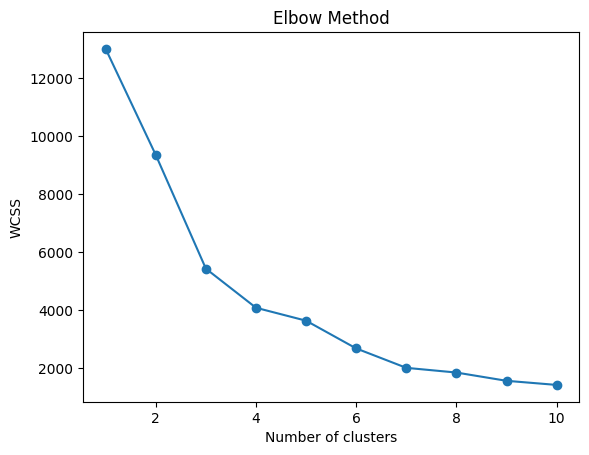

In [15]:

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


In [16]:
# Train KMeans (choose k based on elbow)
kmeans = KMeans(n_clusters=4, random_state=42)
customer_df['Cluster'] = kmeans.fit_predict(X)


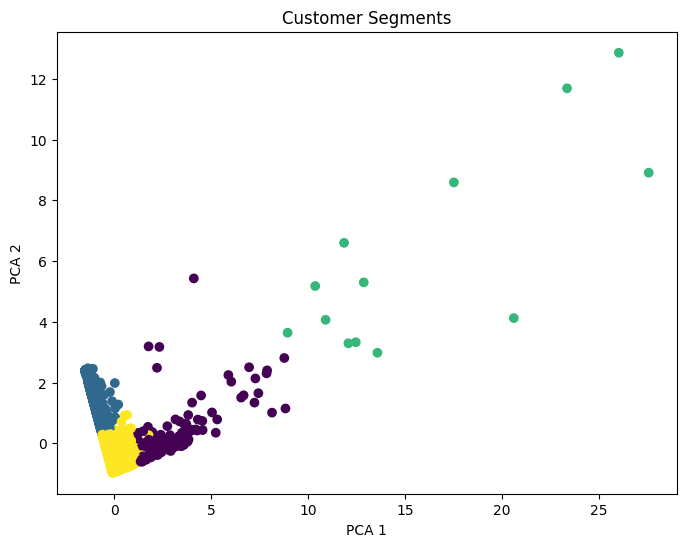

           CustomerID     Recency  Frequency       Monetary
Cluster                                                    
0        15201.928910   14.672986  22.047393   12453.225924
1        15344.258004  247.564030   1.551789     478.107581
2        15435.000000    6.384615  82.692308  127338.313846
3        15290.717982   42.910580   3.655748    1349.698298


In [17]:
# Visualize clusters with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=customer_df['Cluster'], cmap='viridis')
plt.title('Customer Segments')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

# Show sample customers per cluster
print(customer_df.groupby('Cluster').mean())